In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data=pd.read_excel("/cep1_dataset.xlsx")

# Preliminary Analysis

In [6]:
#shape of dataset
print("shape of dataframe is : ", data.shape)

shape of dataframe is :  (303, 14)


In [7]:
# summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Find duplicates based on all columns
duplicates = data[data.duplicated()]

# Print the duplicates
print(duplicates)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [9]:
# Drop duplicate entries and keep the first occurrence
data = data.drop_duplicates()

# Save the modified DataFrame to a new Excel file
data.to_excel('modified_dataset.xlsx', index=False)


In [10]:
#checking number of null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#Get Statistical details of data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# Specify the columns to change data type
columns_to_convert = ['sex', 'fbs', 'exang']

# Convert the data type of the specified columns to object
data[columns_to_convert] = data[columns_to_convert].astype(str)


In [13]:
#list of other categorical variables
categorical_cols = data.select_dtypes(["object"]).columns
categorical_cols

Index(['sex', 'fbs', 'exang'], dtype='object')

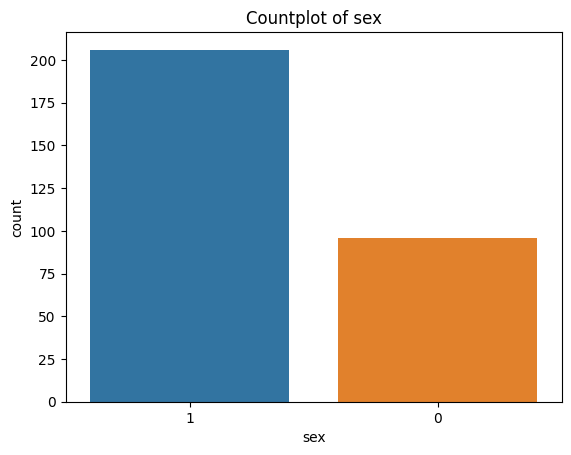

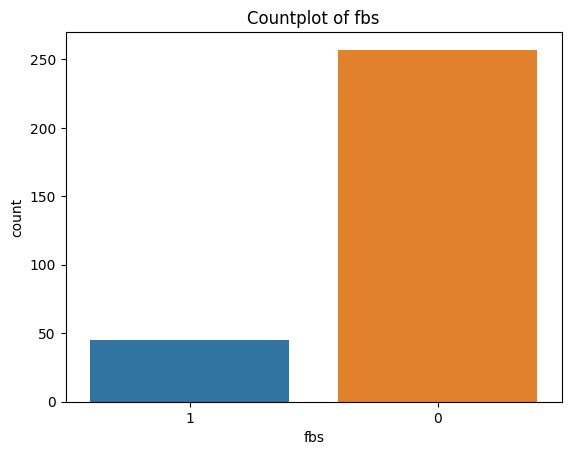

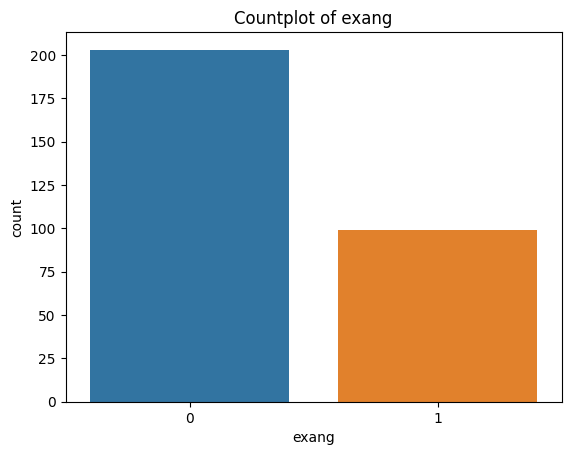

In [14]:
# Select columns with categorical variables
categorical_cols = data.select_dtypes(include=['object'])

# Plot countplot for each categorical variable
for column in categorical_cols.columns:
    sns.countplot(x=column, data=data)
    plt.title(f'Countplot of {column}')
    plt.show()

**Key observations:**
1. No of males is greater than females.
2. Rate of blood sugar levels is in much more control than exercise induced anigna.

# Occurence of CVD across age categories

In [15]:
# Occurence of CVD across the age category
# Create age categories
bins = [0, 30, 40, 50, 60, 70, 100]  # Define the category boundaries
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']  # Define the category labels

# Categorize the age variable in your DataFrame
data['Age Category'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [16]:
occurrence = data.groupby('Age Category')['target'].count()

print(occurrence)

Age Category
<30        1
30-39     14
40-49     72
50-59    125
60-69     80
70+       10
Name: target, dtype: int64


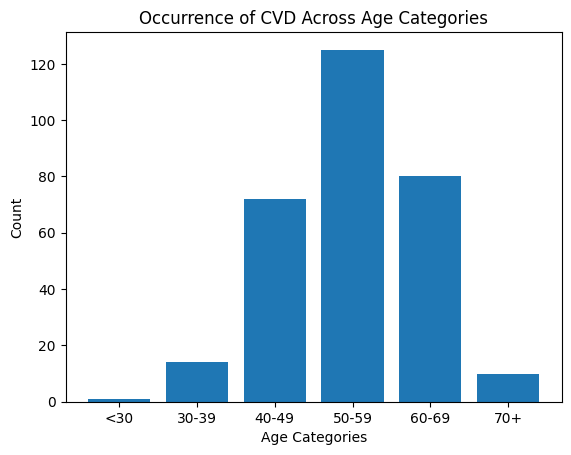

In [17]:
plt.bar(occurrence.index, occurrence.values)

# Add labels and title
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.title('Occurrence of CVD Across Age Categories')

# Display the plot
plt.show()

# Composition of patients across sex category

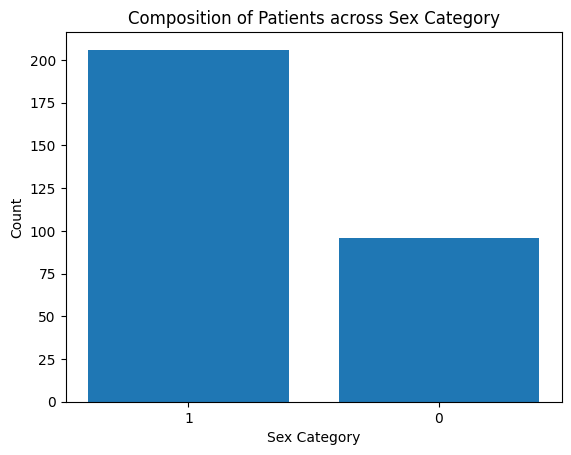

In [18]:
# Calculate composition across sex category
composition = data['sex'].value_counts()

# Create the bar plot
plt.bar(composition.index, composition.values)

# Add labels and title
plt.xlabel('Sex Category')
plt.ylabel('Count')
plt.title('Composition of Patients across Sex Category')

# Display the plot
plt.show()

Clearly, the male patients forms the larger proportion of patients.

# Dependency of heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [19]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['trestbps'], data['target'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)


Chi-square statistic: 47.07422582258187
P-value: 0.5107234863979468
Degrees of freedom: 48


p-value > 0.05, it means no direct relation between trestbps and chances of heart attack. 

#Describe the relationship between cholesterol levels and the target variable

In [20]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway

# Separate cholesterol levels for each target group
cholesterol_target_present = data[data['target'] == 1]['chol']
cholesterol_target_absent = data[data['target'] == 0]['chol']

# Perform t-test
t_statistic, p_value = ttest_ind(cholesterol_target_present, cholesterol_target_absent)

# Perform ANOVA
f_statistic, p_value_anova = f_oneway(cholesterol_target_present, cholesterol_target_absent)

print('T-Test:')
print('T-statistic:', t_statistic)
print('P-value:', p_value)

print('\nANOVA:')
print('F-statistic:', f_statistic)
print('P-value:', p_value_anova)


T-Test:
T-statistic: -1.4152344258787561
P-value: 0.15803697464249714

ANOVA:
F-statistic: 2.0028884801923676
P-value: 0.15803697464249503


p-value > 0.05, it means no relationship between cholestrol levels and the target variable

# Correlation between peak exercise and heart attack

In [26]:
# Correlation analysis
correlation = np.corrcoef(data['oldpeak'], data['target'])
print('Correlation coefficient:', correlation)

Correlation coefficient: [[ 1.         -0.42914583]
 [-0.42914583  1.        ]]


Text(36.804208333333335, 0.5, 'ST depression')

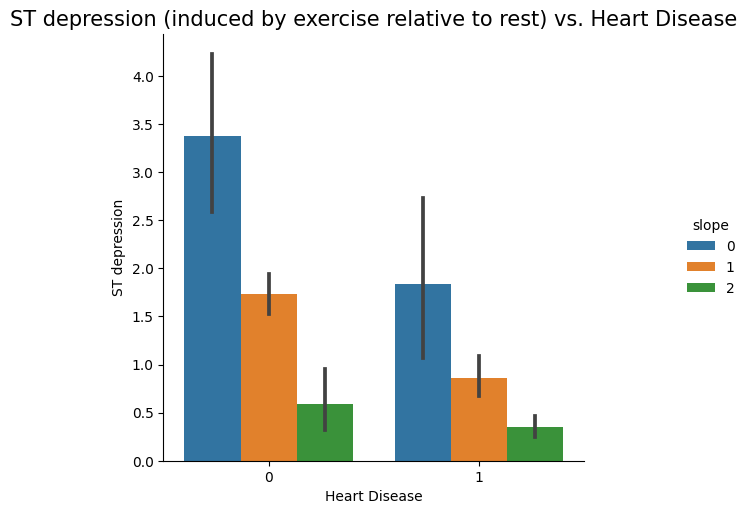

In [28]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=15)
plt.xlabel('Heart Disease',size=10)
plt.ylabel('ST depression',size=10)

*positive patients exhibit about 1/3rd the amount of ST depression induced by exercise relative to rest (oldpeak).*

Text(0, 0.5, 'Thalach Level')

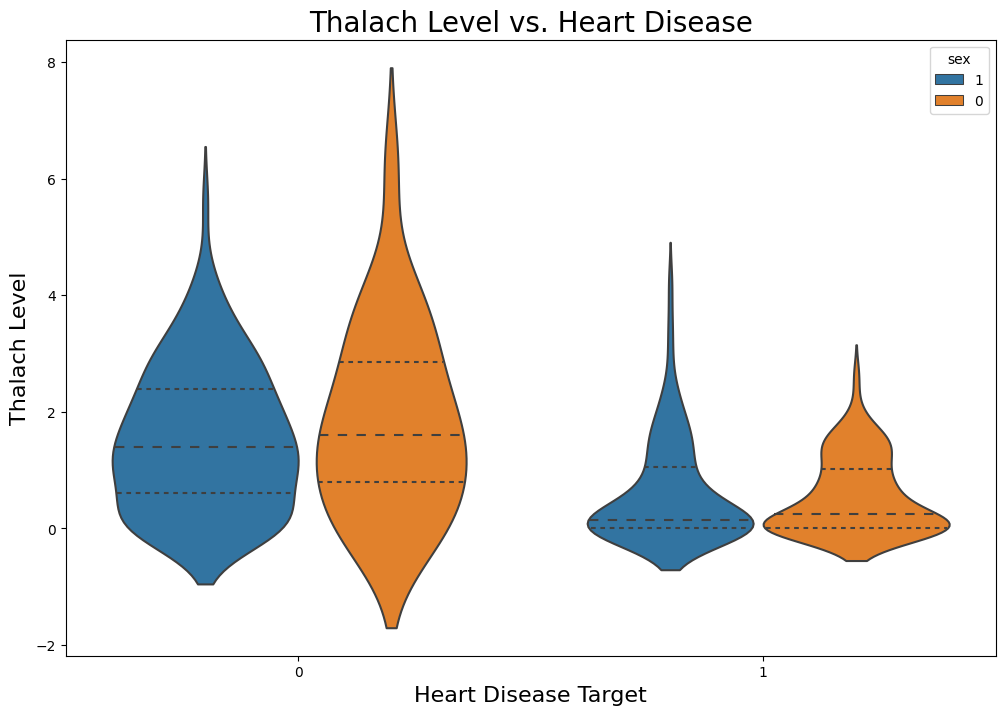

In [25]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= data )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

*Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, while negative patients are between 1 & 3. In addition, we dont see many differences between male & female target outcomes.*

<ipython-input-30-333d3941b3b8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

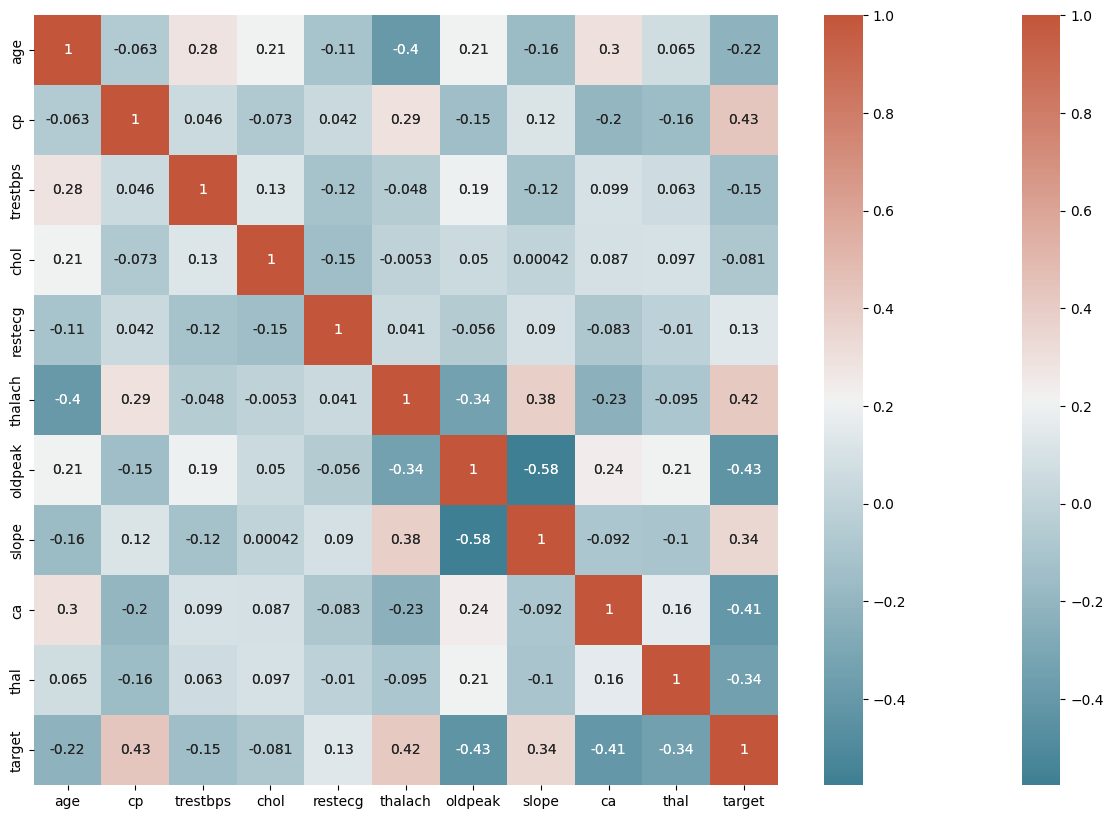

In [30]:
# calculate correlation matrix

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

We can see there is a **positive correlation between chest pain (cp) & target (our predictor)**. This makes sense since, the greater amount of chest pain results in a greater chance of having heart disease. Cp (chest pain), is a ordinal feature with 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic.


### *`Pairplots are also a great way to immediatly see the correlations between all variables. Because with so many features, it can be difficult to see each one. So make a pairplot with only our continous features.`*

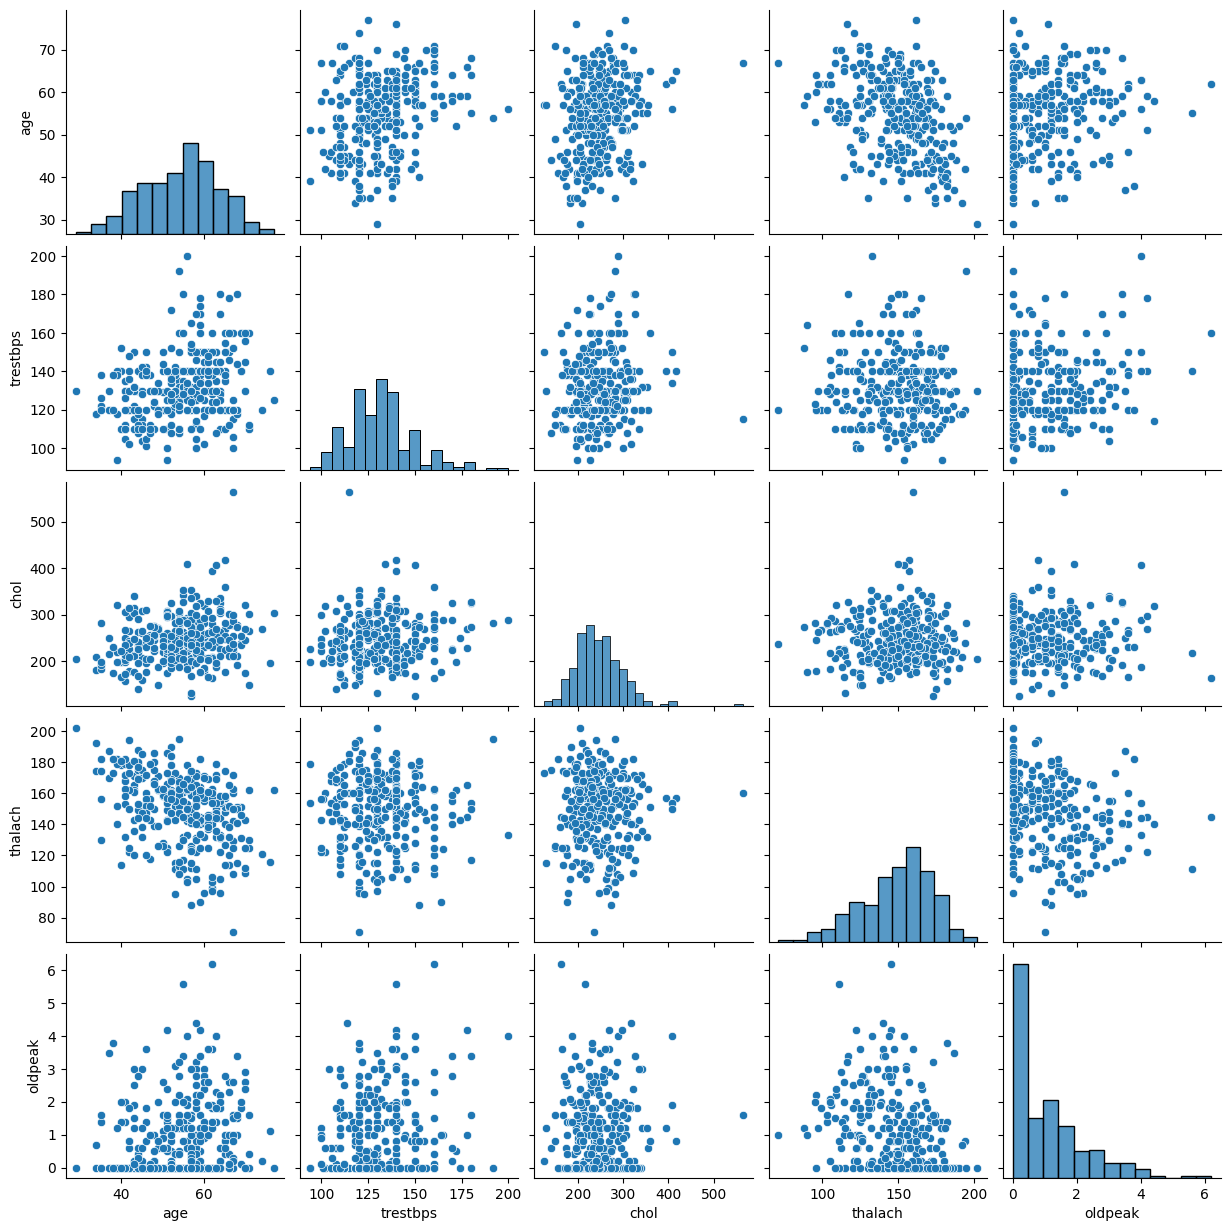

In [31]:
subData = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

# Prepare Data for Modeling

In [71]:
# Identify the target variable
y = data['target'].values
# Separate the features
features = data.drop(columns=['target','Age Category'])
X=features.values

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  

### Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modeling /Training

### We will compare the accuracy of Logistic Regression, Random Forest.

In [78]:
#Model 1: Logistic Regression

from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1) # get instance of model
model.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [79]:
#Model 2: Random Forest
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=1)# get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2= model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



Feature Importance
Feature Importance provides a score that indicates how helpful each feature was in our model.

The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is.


In [88]:

# get importance
importance = model2.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08063
Feature: 1, Score: 0.03266
Feature: 2, Score: 0.16477
Feature: 3, Score: 0.08261
Feature: 4, Score: 0.07576
Feature: 5, Score: 0.00940
Feature: 6, Score: 0.01707
Feature: 7, Score: 0.12168
Feature: 8, Score: 0.05681
Feature: 9, Score: 0.09376
Feature: 10, Score: 0.05028
Feature: 11, Score: 0.11311
Feature: 12, Score: 0.10146


<Axes: >

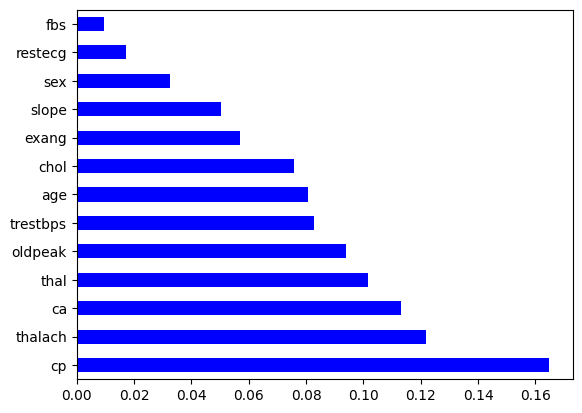

In [89]:
index= data.columns[:-2]
importance = pd.Series(model2.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

### *From the Feature Importance graph above, we can conclude that the top 4 significant features were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).*